In [4]:
# constructed portfolio based on sharpe ration, correlation matrix, expected return 

from datetime import timedelta
import matplotlib.pyplot as plt
import quandl 
import datetime as dt 
import pandas_datareader.data as pdr 
import pandas as pd 
import numpy as np 


In [126]:
#let's say we construct a porfolio with 4 stocks componenets from S&P500
# we are gonna allocate asset given portfolio constituents
tickers = ['GOOGL', 'NEE','AMD','KO']


In [127]:
def get_stock_price(tickers):  
    start = dt.datetime(2019,1,1)
    end =dt.datetime(2019,12,31)
    df_close = pd.DataFrame(columns = tickers)
    for i in tickers: 
        df = pdr.DataReader(i,'yahoo',start,end)
        df_close[i]=df['Adj Close']
    return df_close
df_close = get_stock_price(tickers)
print(df_close.head())

                  GOOGL         NEE        AMD         KO
Date                                                     
2018-12-31  1044.959961  169.715469  18.459999  45.895733
2019-01-02  1054.680054  165.819687  18.830000  45.488636
2019-01-03  1025.469971  165.409607  17.049999  45.207542
2019-01-04  1078.069946  168.455917  19.000000  46.108978
2019-01-07  1075.920044  168.211823  20.570000  45.508022


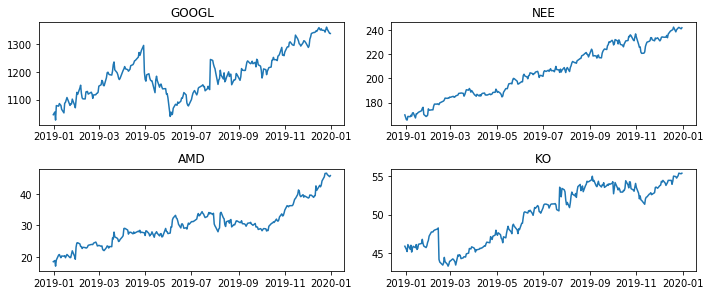

In [128]:
def stock_price_visualisation(tickers):
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(321)
    ax2 = fig.add_subplot(322)
    ax3 = fig.add_subplot(323)
    ax4 = fig.add_subplot(324)

    ax1.plot(df_close[tickers[0]])
    ax1.set_title(tickers[0])
    ax2.plot(df_close[tickers[1]])
    ax2.set_title(tickers[1])
    ax3.plot(df_close[tickers[2]])
    ax3.set_title(tickers[2])
    ax4.plot(df_close[tickers[3]])
    ax4.set_title(tickers[3])

    plt.tight_layout()
    plt.show()
stock_price_visualisation(tickers)

In [129]:
def excess_return(tickers):
    df_excess = pd.DataFrame([])
    df_return = pd.DataFrame([])
    df_close = get_stock_price(tickers)
    for ticker in tickers:
        df_return[ticker] = np.log(df_close[ticker]).diff()
#         df_return[ticker] = df_close[ticker].pct_change()
        
        df_excess[ticker] = [(i - df_return[ticker].mean(axis = 0)) for i in df_return[ticker].values] 
    df_return.dropna(inplace = True)
    df_excess.dropna(inplace = True)
    print(df_return.columns)
    return df_excess, df_return,df_close 
df_excess, df_return,df_close = excess_return(tickers)
print(df_return.head())
print(df_excess.head())

Index(['GOOGL', 'NEE', 'AMD', 'KO'], dtype='object')
               GOOGL       NEE       AMD        KO
Date                                              
2019-01-02  0.009259 -0.023222  0.019845 -0.008910
2019-01-03 -0.028086 -0.002476 -0.099301 -0.006199
2019-01-04  0.050021  0.018249  0.108289  0.019744
2019-01-07 -0.001996 -0.001450  0.079395 -0.013119
2019-01-08  0.008745  0.007287  0.008713  0.011225
      GOOGL       NEE       AMD        KO
1  0.008274 -0.024633  0.016234 -0.009653
2 -0.029072 -0.003887 -0.102912 -0.006942
3  0.049036  0.016839  0.104678  0.019000
4 -0.002981 -0.002861  0.075784 -0.013862
5  0.007760  0.005876  0.005101  0.010482


In [130]:
def variance_covariance_matrix(tickers):   
    df_excess, df_return,df_close = excess_return(tickers)
    n = df_close.shape[0]
    covariance_matrix = (np.dot((np.array(df_excess)/n).T, np.array(df_excess))) #(df.shape[0],ticker).T(df.shape[0],ticker) = (ticker,ticker)
    return covariance_matrix #(4,4)
covariance_mat = variance_covariance_matrix(tickers)
print(covariance_mat)
print(df_return.cov())

Index(['GOOGL', 'NEE', 'AMD', 'KO'], dtype='object')
[[ 2.20155608e-04  4.81986397e-06  2.07976103e-04  3.27068753e-05]
 [ 4.81986397e-06  8.16553292e-05 -2.36726916e-06  3.34986203e-05]
 [ 2.07976103e-04 -2.36726916e-06  1.09098527e-03  5.00194490e-05]
 [ 3.27068753e-05  3.34986203e-05  5.00194490e-05  1.15383004e-04]]
          GOOGL       NEE       AMD        KO
GOOGL  0.000222  0.000005  0.000210  0.000033
NEE    0.000005  0.000082 -0.000002  0.000034
AMD    0.000210 -0.000002  0.001100  0.000050
KO     0.000033  0.000034  0.000050  0.000116


In [131]:
def std_each_stock(tickers):
    std = []
    for ticker in tickers: 
        a = np.std(np.array(df_return[ticker])) #, dtype = np.float64
        std.append(a)
    std_array = np.array(std).reshape(len(tickers),1)
    #print("std_array:\n",std_array)
    return std_array 
std_array = std_each_stock(tickers)
print(std_array)

[[0.01486705]
 [0.00905425]
 [0.03309554]
 [0.01076294]]


In [132]:
def std_matrix(tickers): 
    std_array = std_each_stock(tickers) 
    std_mat = np.dot(std_array, std_array.T) #(4,1)(4,1).T = (4,4)
    return std_mat #(stocks, stocks)
std_mat = std_matrix(tickers)


In [133]:
def correlation_matrix(std_mat):
    correlation_mat = covariance_mat/std_mat #(4,4)/(4,4)
    return correlation_mat #(4,4)
correlation_mat = correlation_matrix(std_mat)
print(correlation_mat)
print(df_return.corr())
# the result, below, shows that there are no strong correlation between constituents in the portfolio 

[[ 0.99604743  0.03580615  0.42268724  0.20440112]
 [ 0.03580615  0.99604743 -0.00789998  0.34375083]
 [ 0.42268724 -0.00789998  0.99604743  0.1404231 ]
 [ 0.20440112  0.34375083  0.1404231   0.99604743]]
          GOOGL       NEE       AMD        KO
GOOGL  1.000000  0.035948  0.424365  0.205212
NEE    0.035948  1.000000 -0.007931  0.345115
AMD    0.424365 -0.007931  1.000000  0.140980
KO     0.205212  0.345115  0.140980  1.000000


In [134]:
def weights_simulation(num_stock):
    b =np.random.randint(10, size = num_stock)
    init_weights = np.array([j/np.sum(b) for j in b]).reshape(num_stock,1)  #(4,1)  
    return init_weights
init_weights = weights_simulation(4)
print(init_weights)

[[0.36]
 [0.2 ]
 [0.16]
 [0.28]]


In [136]:
def portfolio_risk(weights): #Portfolio Variance = Sqrt (Transpose (Wt.SD) * Correlation Matrix * Wt. SD)
    correlation_mat = correlation_matrix(weights)
    port_variance = np.dot(np.dot(weights.T, correlation_mat), weights) #{[(4,1).T(4,4) = (1,4)], (4,1)} = (1,1)
    port_std = np.sqrt(port_variance)
    return port_std #(1,1) 
port_std = portfolio_risk(init_weights)
print(port_std)

[[0.02171328]]


In [137]:
def portfolio_return(weights,df_return):
    average_return_stock ={}
    list_avg_return = []
    avg_return = np.array([])
    for i in df_return.columns:
        average_return_stock[i] = df_return[i].mean() 
        list_avg_return.append(average_return_stock[i])

    avg_return = np.array(list_avg_return).reshape(1,len(df_return.columns))
    expected_return = np.sum(avg_return*weights.T) # (1, ticker)(4, 1).T = (df.shape, ticker)
    return expected_return
expected_return = portfolio_return(init_weights,df_return)
print(expected_return)

0.0014226314535728435


In [106]:
def find_current_rf_rate():
    end = dt.datetime(2019,12,31)
    #start = dt.datetime(2019,1,1)
    df = pdr.DataReader('DGS10','fred', start = end, end = end )
    for i in range(30):
        if df.empty:
            end = end + timedelta(-1) 
            df = pdr.DataReader('DGS10','fred', start = end, end = end )
        else:
            print("the US 10 year treasury bond yield is:\n", df.head())
            break 
    return df.values
rf = find_current_rf_rate()
rf = float(rf)/100
print (rf)


the US 10 year treasury bond yield is:
             DGS10
DATE             
2019-12-31   1.92
0.0192


In [138]:
# simulated portfolio weight and following portfolio return and sharpe ratio 
def Find_Sharpe_Ratio(rf): # (average return - rf ) /std 
    column = ['sharpe','expected_return']  + ['w1']+['w2']+['w3']+['w4']
    df_risk_return = pd.DataFrame(0, columns = column,index=np.arange(10000) )
    
    for i in range(10000):
        W = weights_simulation(4)
        expected_return = portfolio_return(W,df_return)
        port_risk = portfolio_risk(W)
        port_risk = np.array(port_risk)
        weight = list(W)#(4,1)
        sharpe = (expected_return - rf)/port_risk #[(1,1) - (1,1)]/(1,1)
        
        df_risk_return.iloc[i,0] = sharpe[0][0]
        df_risk_return.iloc[i,1] = expected_return
        df_risk_return.iloc[i,2] = weight[0]
        df_risk_return.iloc[i,3] = weight[1]
        df_risk_return.iloc[i,4] = weight[2]
        df_risk_return.iloc[i,5] = weight[3]
    return df_risk_return
df_risk_return = Find_Sharpe_Ratio(rf)
print(df_risk_return)

/Users/kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


        sharpe  expected_return        w1        w2        w3        w4
0    -0.646997         0.001949  0.222222  0.055556  0.388889  0.333333
1          NaN         0.002536  0.000000  0.411765  0.529412  0.058824
2    -0.613733         0.002239  0.117647  0.176471  0.470588  0.235294
3    -0.708344         0.001761  0.291667  0.166667  0.291667  0.250000
4          NaN         0.001702  0.350000  0.450000  0.200000  0.000000
5    -0.699880         0.001862  0.227273  0.227273  0.318182  0.227273
6    -0.644163         0.002263  0.062500  0.375000  0.437500  0.125000
7    -0.622845         0.002093  0.238095  0.095238  0.428571  0.238095
8          NaN         0.001694  0.000000  0.350000  0.250000  0.400000
9          NaN         0.001180  0.411765  0.000000  0.117647  0.470588
10   -0.781768         0.001366  0.538462  0.076923  0.153846  0.230769
11         NaN         0.001925  0.083333  0.666667  0.250000  0.000000
12   -0.892438         0.001329  0.250000  0.250000  0.125000  0

In [107]:
# the result above shows that it need futher research on asset selection cuz there's no positive sharpe ration, which
# indicating that as the risk increases the return does not increase accordingly.


In [140]:
# compared the portfolio components to s&p500 performance
end = dt.datetime(2019,12,31)
start = dt.datetime(2019,1,1)
df = pdr.DataReader('^GSPC','yahoo', start = end, end = end )
return_sp500 = np.log(df).diff()
avg_return_sp = return_sp500['Adj Close'].mean()
print(avg_return_sp)

0.0029416906441905866


In [ ]:
'''
in addition, the return sp500 above are higher than the simulated 10000 portfolio. The componenets in the portfolio 
should be modified. 
'''
